# Step 1: Import

In [1]:
# our core libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor

# Step 2: Load data

## netmats1.txt

In [2]:
N = 100
netmats1_df = pd.read_csv('../../data/connectivityml/HCP_PTN1200/netmats/3T_HCP1200_MSMAll_d'+str(N)+'_ts2/netmats1.txt', delim_whitespace=True,header=None)
print("Network-matrices data shape:", netmats1_df.shape)
netmats1_df.head()

Network-matrices data shape: (1003, 10000)


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,-1.5323,35.936,-4.9815,-4.75670,1.38060,2.0624,5.8417,5.1702,-6.5932,...,1.80010,4.40690,3.27060,1.710300,3.5560,0.81577,2.21120,3.6853,4.4970,0
1,0,-4.3627,22.130,-19.5240,10.12900,-7.16490,5.8310,-2.0110,-3.2240,-10.0470,...,-0.54435,0.82136,-0.15673,0.002443,1.9650,1.17590,-0.66842,2.5284,1.4772,0
2,0,-3.3764,17.130,-23.8620,0.46252,12.34500,-1.8014,-2.3384,-1.0635,8.3071,...,0.55043,-2.20120,6.05880,5.583500,6.0867,-1.64230,-2.68150,2.4673,2.4039,0
3,0,1.5948,13.595,-31.2170,0.16253,-0.18071,1.1656,-3.6007,3.8794,-5.8619,...,1.21400,0.64097,1.24110,2.465400,3.3396,-0.94855,0.91456,1.6053,2.8845,0
4,0,10.9680,17.322,-19.1960,-13.93100,8.61630,1.8109,-6.5545,20.7600,10.0900,...,1.39450,0.94140,1.41880,0.719040,3.4329,0.98975,-0.17552,1.3239,2.5881,0


## netmats2.txt

In [3]:
N = 100
netmats2_df = pd.read_csv('../../data/connectivityml/HCP_PTN1200/netmats/3T_HCP1200_MSMAll_d'+str(N)+'_ts2/netmats2.txt', delim_whitespace=True,header=None)
print("Network-matrices data shape:", netmats2_df.shape)
netmats2_df.head()

Network-matrices data shape: (1003, 10000)


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0.616760,9.5727,-5.4959,0.34639,3.0090,3.2134,1.1298,1.58890,-2.33410,...,1.185400,1.55440,1.369600,1.3055,2.8770,1.66720,0.14911,3.0171,0.26007,0
1,0,-0.296640,17.3170,-9.0467,-0.28723,1.3473,1.0459,1.7133,0.49141,-0.29712,...,0.038296,0.99805,0.618580,1.6566,2.5237,-0.40272,-0.38607,3.0958,1.29190,0
2,0,1.648600,6.6189,-8.8877,1.43370,1.0060,2.1167,2.4575,-0.11689,1.96460,...,-0.068334,0.83626,-0.004783,2.5012,8.2278,0.83097,-1.69360,2.8515,-2.08240,0
3,0,-0.902750,7.7215,-8.3907,3.31440,2.9395,3.4270,6.7093,1.36210,-2.66980,...,0.605570,0.98066,-0.791140,3.7111,4.3410,-0.29930,0.46776,2.4837,0.59513,0
4,0,-0.088768,9.4979,-10.4120,1.06460,4.3362,1.7206,4.5520,3.19110,-3.30900,...,1.709600,0.99331,0.326620,2.5242,4.2467,0.51453,-0.40380,1.2692,1.19840,0


## Some more exploratory analysis to understand netmats1 and netmats2

To be updated

## Behavioral data

In [4]:
behavioral_df = pd.read_csv('../../data/connectivityml/unrestricted_pkalra_7_26_2021_17_39_25.csv')
print("Behaviora data shape:", behavioral_df.shape)
behavioral_df.head()

Behaviora data shape: (1206, 582)


,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88


## Subject ID

In [5]:
subjectsID_df = pd.read_csv('../../data/connectivityml/HCP_PTN1200/subjectIDs.txt',header=None,names=["Subject"])
print("Subjects ID data shape:", subjectsID_df.shape)
subjectsID_df.head()

Subjects ID data shape: (1003, 1)


,Subject
0,100206
1,100307
2,100408
3,100610
4,101006


In [6]:
filter_behavioral_df = subjectsID_df.merge(behavioral_df, on='Subject', how='inner')
print("Filtered behaviora data shape:", filter_behavioral_df.shape)
filter_behavioral_df.head()

Filtered behaviora data shape: (1003, 582)


,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
1,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
2,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
3,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88
4,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80


## Visualization

In [7]:
filter_behavioral_df.columns

Index(['Subject', 'Release', 'Acquisition', 'Gender', 'Age',
       '3T_Full_MR_Compl', 'T1_Count', 'T2_Count', '3T_RS-fMRI_Count',
       '3T_RS-fMRI_PctCompl',
       ...
       'Noise_Comp', 'Odor_Unadj', 'Odor_AgeAdj', 'PainIntens_RawScore',
       'PainInterf_Tscore', 'Taste_Unadj', 'Taste_AgeAdj', 'Mars_Log_Score',
       'Mars_Errs', 'Mars_Final'],
      dtype='object', length=582)

### Histograms

y_age shape: (1003,)
y_MMSE_Score shape: (1003,)
y_PSQI_Score shape: (1003,)


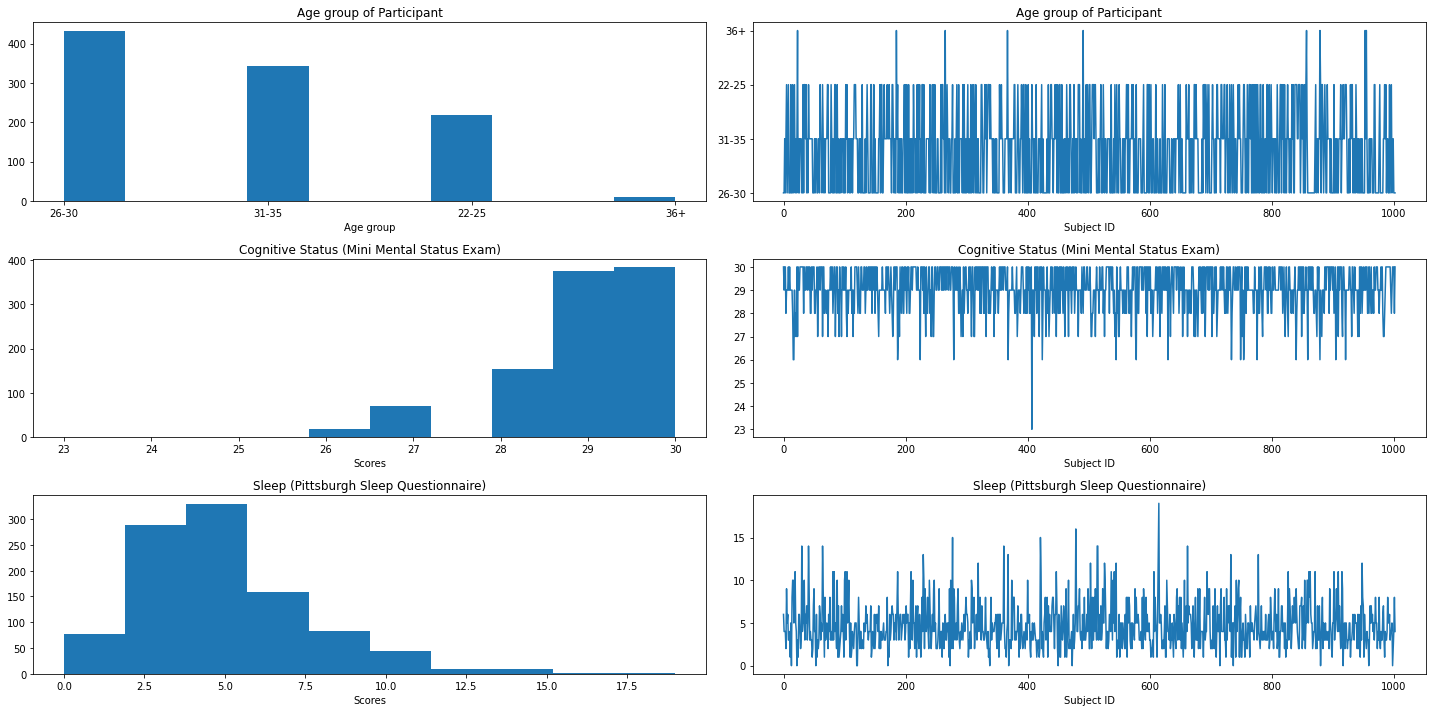

In [8]:
X = netmats2_df.values

y_age = filter_behavioral_df.Age # Age group of Participant, banded in five-year increments
print("y_age shape:", y_age.dropna().shape)
y_MMSE_Score = filter_behavioral_df.MMSE_Score # Cognitive Status (Mini Mental Status Exam)
print("y_MMSE_Score shape:", y_MMSE_Score.dropna().shape)
y_PSQI_Score = filter_behavioral_df.PSQI_Score # Sleep (Pittsburgh Sleep Questionnaire)
print("y_PSQI_Score shape:", y_PSQI_Score.dropna().shape)

fig, ax = plt.subplots(3,2,figsize=(20, 10))
ax[0][0].hist(y_age)
ax[0][0].set_title("Age group of Participant")
ax[0][0].set_xlabel("Age group")
ax[1][0].hist(y_MMSE_Score)
ax[1][0].set_title("Cognitive Status (Mini Mental Status Exam)")
ax[1][0].set_xlabel("Scores")
ax[2][0].hist(y_PSQI_Score)
ax[2][0].set_title("Sleep (Pittsburgh Sleep Questionnaire)")
ax[2][0].set_xlabel("Scores")

ax[0][1].plot(y_age)
ax[0][1].set_title("Age group of Participant")
ax[0][1].set_xlabel("Subject ID")
ax[1][1].plot(y_MMSE_Score)
ax[1][1].set_title("Cognitive Status (Mini Mental Status Exam)")
ax[1][1].set_xlabel("Subject ID")
ax[2][1].plot(y_PSQI_Score)
ax[2][1].set_title("Sleep (Pittsburgh Sleep Questionnaire)")
ax[2][1].set_xlabel("Subject ID")

fig.tight_layout()

### Countplots for each of our categorical variables

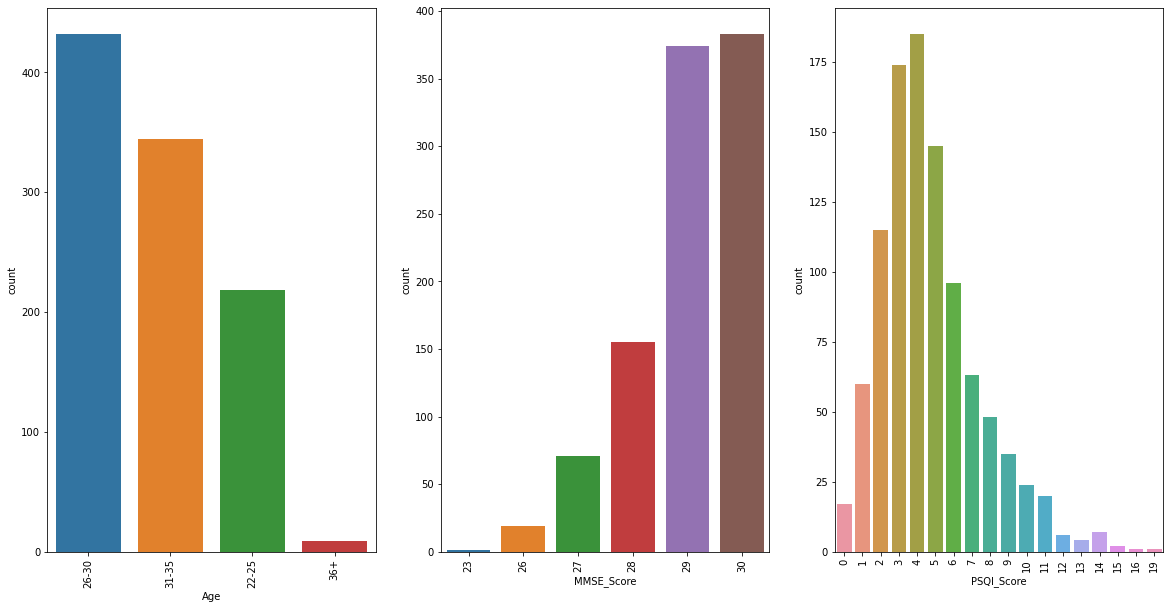

In [9]:
allY = [y_age,y_MMSE_Score,y_PSQI_Score]
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for variable, subplot in zip([0,1,2], ax.flatten()):
    sns.countplot(x=allY[variable], ax=subplot) # specify variable x wiped out the warning messages
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Step 3: Explore Machine Learning Models using scikit-learn

See more [here](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

The following are implemented:
 1. [Linear Support Vector Classifier (LSVC)](#lsvc)
 2. [Support Vector Classifier (SVC)](#svc)
 3. [KNeighborsClassifier](#knc)
 4. [Regression based on k-nearest neighbors]($rknn)
 5. [Stochastic Gradient Descent (SGD)](#sgd)  
 ...

<a name="lsvc"></a>
## Linear Support Vector Classifier (LSVC)

In [10]:
# Code

<a name="svc"></a>
## Support Vector Classifier (LSVC)

In [11]:
# Code

<a name="knc"></a>
## KNeighborsClassifier

In [12]:
# Code

<a name="rknn"></a>
## Regression based on k-nearest neighbors

In [13]:
# Code

<a name="sgd"></a>
## Stochastic Gradient Descent (SGD)

In [14]:
# Code

### ... and more